# Ячейка с импортом библиотек

In [ ]:
# Подключение модулей
from scipy.stats import norm, uniform, expon
import matplotlib.pyplot as plt
import numpy as np

# Моделирование случайной величины

#### Параметры моделирования и распределения
$$
\text{SIGMA\_PARAM} - \sigma\text{, СКО}; \\

\text{MU\_PARAM} - \text{m, математическое ожидание}; \\

\text{N\_VALUES} - \text{число опытов со случайным исходом}; \\

\text{N\_INDEPENDENT} - \text{число независимых ДСЧ}.
$$

In [107]:
SIGMA_PARAM = 3
MU_PARAM = 2         
N_VALUES = 10000
N_INDEPENDENT = 12

#### Формирование нормально распределенной СВ двумя способами

Встроенная функция из модуля numpy:

In [ ]:
Z_LIB = np.random.normal(
                loc=MU_PARAM,
                scale=SIGMA_PARAM,
                size=N_VALUES)

Формирование нормально распределенной СВ z из равномерно распределенной СВ x на интервале [0,1) с помощью центральной предельной теоремы:

$$
z = \dfrac{(y - m_y) \sigma}{\sqrt{D_y}} + m, \text{ где} \\
y = \displaystyle\sum_{i=1}^n x_i - \text{формула центральной предельной теоремы}\\
D_y = n/12 - \text{дисперсия СВ y} \\
m_y = n/2 - \text{математическое ожидание СВ y} \\
\sigma = \text{sigma\_param} - \text{СКО ГСВ} \\
m = \text{mu\_param} - \text{математическое ожидание ГСВ}
$$

In [ ]:
X_I = np.random.uniform(
                low=0.0, # нижняя граница
                high=1.0, # верхняя граница
                size=(N_VALUES, N_INDEPENDENT)) # Размер. Вдоль одной оси - число реализаций, вдоль второй - разные ДСЧ
Y_S = np.sum(X_I, axis=1) # Суммируем реализации СВ от разных ДСЧ
Z_CUSTOM = (Y_S - N_INDEPENDENT/2)*SIGMA_PARAM/np.sqrt(N_INDEPENDENT/12) + MU_PARAM

### Графики ПРВ (аналитический и экспериментальный) равномерно распределенной СВ

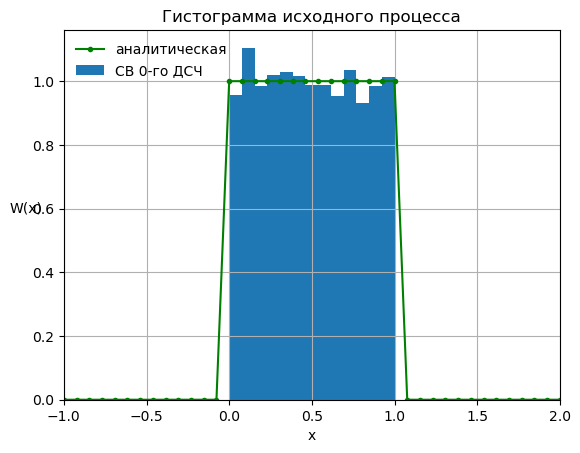

In [ ]:
n_edges = 40 # Число граней, определяющее число "бинов", между которыми распределяются реализации
x_axis = np.linspace(-1, 2,n_edges) # Массив значений для оси абсцисс
wx_analityc = (x_axis>=0) & (x_axis<=1) # Способ задать аналитическое представление ПРС равномерной СВ
plt.plot(x_axis, wx_analityc, 'g.-', label='аналитическая')
plt.hist(X_I[:,0], density=True, bins=x_axis, label='СВ 0-го ДСЧ')
# Форматирование графика
plt.legend(loc='best', frameon=False)
plt.title('Гистограмма исходного процесса')
plt.xlabel('x')
plt.xlim((-1,2))
plt.ylabel('W(x)', rotation='horizontal')
plt.grid(visible=True)
plt.show()

### Графики ПРВ (аналитический и экспериментальный) Гауссовской СВ

In [ ]:
n_edges = 40 # число "дискрет" гистограммы
x_axis = np.linspace(
                -3*SIGMA_PARAM + MU_PARAM,
                +3*SIGMA_PARAM + MU_PARAM,
                n_edges)
wz_analityc = norm.pdf(
                x_axis,
                loc=MU_PARAM,
                scale=SIGMA_PARAM)

# Графики

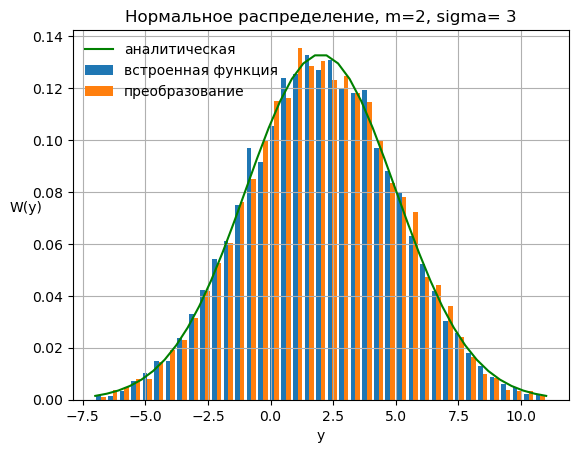

In [ ]:
plt.plot(x_axis, wz_analityc, 'g-', label='аналитическая')
plt.hist([Z_LIB, Z_CUSTOM], density=True, bins=x_axis, label=['встроенная функция','преобразование'])
# Форматирование графика
plt.legend(loc='best', frameon=False)
plt.title('Нормальное распределение, m=' + str(MU_PARAM) + ', sigma= ' + str(SIGMA_PARAM))
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(visible=True)
plt.show()

# ЗАДАНИЕ

Смоделируйте в последующих ячейках распределение, заданное Вам по варианту, опираясь на приведенный выше код